<a href="https://colab.research.google.com/github/Archana9991/Exploratory-Data-Analysis-of-Car-Features/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)

In [11]:
#reading data into pandas
car_data=pd.read_csv("data.csv")
car_data.describe(),car_data.shape

(               Year    Engine HP  ...    Popularity          MSRP
 count  11914.000000  11845.00000  ...  11914.000000  1.191400e+04
 mean    2010.384338    249.38607  ...   1554.911197  4.059474e+04
 std        7.579740    109.19187  ...   1441.855347  6.010910e+04
 min     1990.000000     55.00000  ...      2.000000  2.000000e+03
 25%     2007.000000    170.00000  ...    549.000000  2.100000e+04
 50%     2015.000000    227.00000  ...   1385.000000  2.999500e+04
 75%     2016.000000    300.00000  ...   2009.000000  4.223125e+04
 max     2017.000000   1001.00000  ...   5657.000000  2.065902e+06
 
 [8 rows x 8 columns], (11914, 16))

In [12]:
#null values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [13]:
#drop of market category
car_data=car_data.drop(columns="Market Category")
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [16]:
#Renaming the Columns
car_data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'MRP'},inplace = True)

In [17]:
# Total number of rows and columns
car_data.shape

(11914, 15)

In [18]:
# Rows containing duplicate data
duplicate_rows = car_data[car_data.duplicated()]
print(duplicate_rows)

         Make     Model  Year  ... MPG-C  Popularity    MRP
14        BMW  1 Series  2013  ...    19        3916  31500
18       Audi       100  1992  ...    17        3105   2000
20       Audi       100  1992  ...    17        3105   2000
24       Audi       100  1993  ...    17        3105   2000
25       Audi       100  1993  ...    17        3105   2000
...       ...       ...   ...  ...   ...         ...    ...
11481  Suzuki      X-90  1998  ...    22         481   2000
11603   Volvo      XC60  2017  ...    20         870  46350
11604   Volvo      XC60  2017  ...    23         870  40950
11708  Suzuki       XL7  2008  ...    15         481  29149
11717  Suzuki       XL7  2008  ...    16         481  27499

[720 rows x 15 columns]


In [19]:
# Used to count the number of rows before removing the data
car_data.count() 

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
MRP                 11914
dtype: int64

In [20]:
# Dropping the duplicates 
car_data = car_data.drop_duplicates()
car_data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [21]:
# Counting the number of rows after removing duplicates.
car_data.count()

Make                11194
Model               11194
Year                11194
Engine Fuel Type    11191
HP                  11125
Cylinders           11164
Transmission        11194
Drive Mode          11194
Number of Doors     11188
Vehicle Size        11194
Vehicle Style       11194
MPG-H               11194
MPG-C               11194
Popularity          11194
MRP                 11194
dtype: int64

In [22]:
# Finding the null values.
print(car_data.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
MRP                  0
dtype: int64


In [23]:
# Dropping the missing values.
car_data = car_data.dropna() 
car_data.count()

Make                11092
Model               11092
Year                11092
Engine Fuel Type    11092
HP                  11092
Cylinders           11092
Transmission        11092
Drive Mode          11092
Number of Doors     11092
Vehicle Size        11092
Vehicle Style       11092
MPG-H               11092
MPG-C               11092
Popularity          11092
MRP                 11092
dtype: int64

In [24]:
# After dropping the values
print(car_data.isnull().sum()) 

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
MRP                 0
dtype: int64


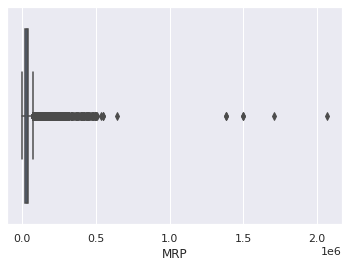

In [27]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=car_data['MRP'])

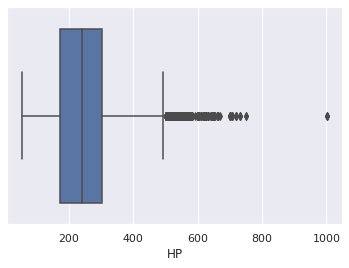

In [28]:
sns.boxplot(x=car_data['HP'])

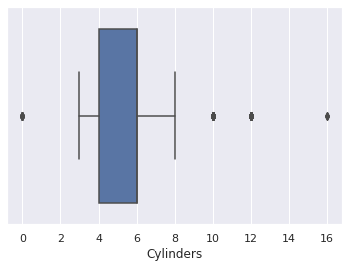

In [29]:
sns.boxplot(x=car_data['Cylinders'])

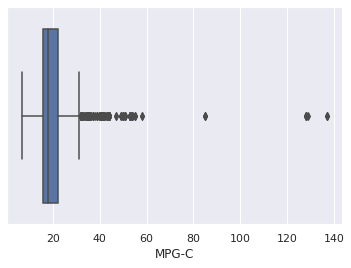

In [30]:
sns.boxplot(x=car_data['MPG-C'])

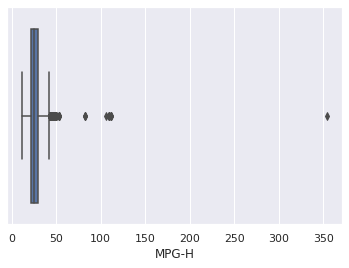

In [31]:
sns.boxplot(x=car_data['MPG-H'])

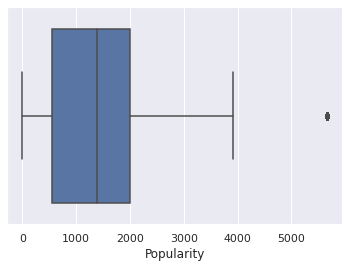

In [32]:
sns.boxplot(x=car_data['Popularity'])

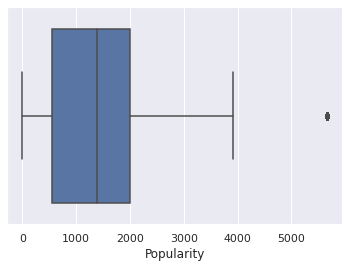

In [33]:
sns.boxplot(x=car_data['Popularity'])

In [34]:
#Finding IQR
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
MRP                21485.0
dtype: float64


In [35]:
#Removing Outliners
car_data = car_data[~((car_data < (Q1 - 1.5 * IQR)) |(car_data > (Q3 + 1.5 * IQR))).any(axis=1)]

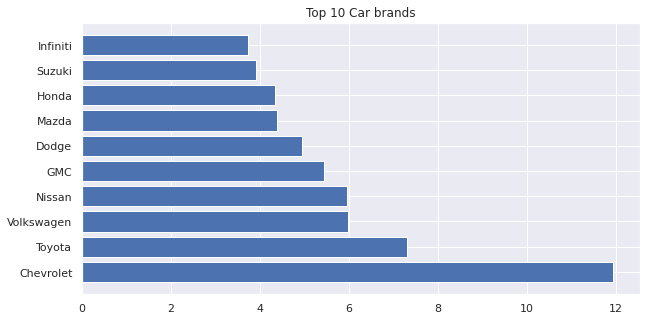

In [36]:
# Percentage of car per brand
counts = car_data['Make'].value_counts()*100/sum(car_data['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [37]:
prices = car_data[['Make','MRP']].loc[(car_data['Make'] == 'Chevrolet')|
               (car_data['Make'] == 'Ford')|
               (car_data['Make'] == 'Volkswagen')|
               (car_data['Make'] == 'Toyota')|
               (car_data['Make'] == 'Dodge')|
               (car_data['Make'] == 'Nissan')|
               (car_data['Make'] == 'GMC')|
               (car_data['Make'] == 'Honda')|
               (car_data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                     MRP
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


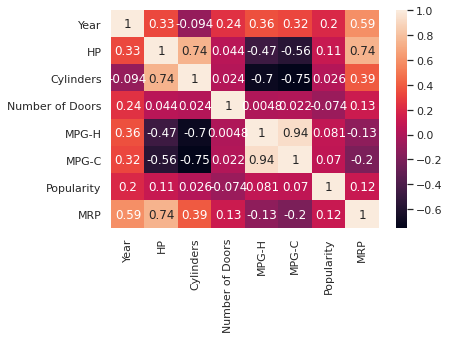

In [38]:
#Plotting Correlation Matrix
corrMatrix = car_data.corr()
sns.heatmap(corrMatrix, annot=True)

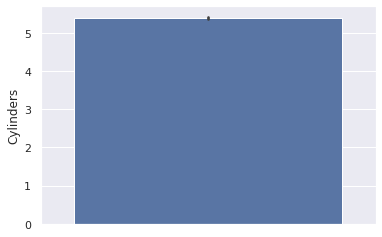

In [39]:
sns.barplot(y=car_data['Cylinders'])

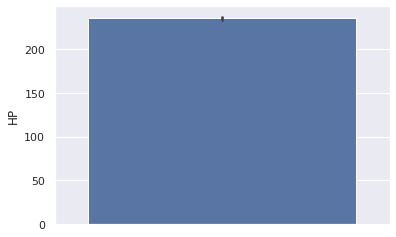

In [40]:
sns.barplot(y=car_data['HP'])

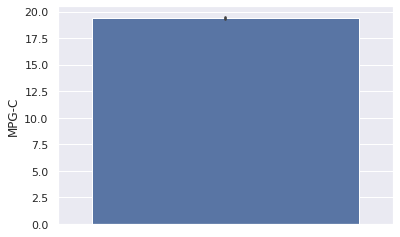

In [41]:
sns.barplot(y=car_data['MPG-C'])

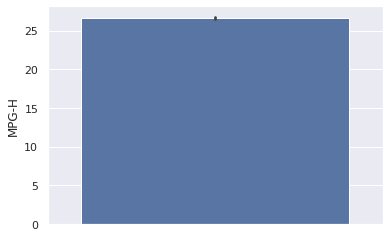

In [42]:
sns.barplot(y=car_data['MPG-H'])

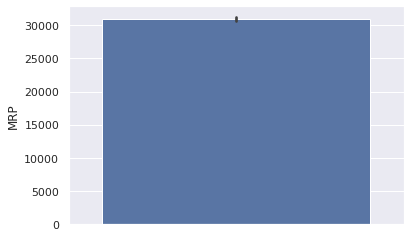

In [43]:
sns.barplot(y=car_data['MRP'])

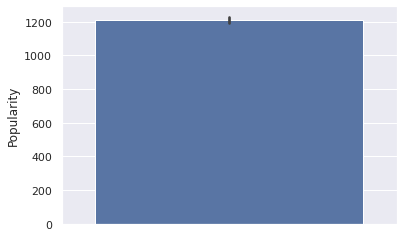

In [44]:
sns.barplot(y=car_data['Popularity'])

In [45]:
y = car_data['MRP']

In [48]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(car_data, y, test_size=0.2)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(6887, 15) (6887,)
(1722, 15) (1722,)


In [49]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

NameError: ignored